# Queue Estimation on LLMs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
def title_from_exp_str(s):
    # Replace underscores with spaces
    s = s.replace('_', ' ')
    
    # Insert '=' between letters and numbers
    s = re.sub(r'([a-zA-Z])(\d+)', r'\1=\2', s)
    
    # Add commas to large numbers (1,000 and above)
    s = re.sub(r'(\d{1,3})(?=(\d{3})+(?!\d))', r'\1,', s)
    
    return s


In [3]:
data_dir = "data_19Nov"

## C=1 w=800_000 t=100 n=60 d=5

In [4]:
C=1
w=800_000
t=100
n=60
d=5

In [5]:
lam = float(C*1_000_000/w)

In [6]:
exp_str = f'C{C}_w{w}_t{t}_n{n}_d{d}'

In [7]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fname = f'{data_dir}/round_trips_{exp_str}.csv'

In [8]:
print(f'Reading from {q_fname} and {r_fname}')

Reading from data_19Nov/queue_size_C1_w800000_t100_n60_d5.csv and data_19Nov/round_trips_C1_w800000_t100_n60_d5.csv


In [9]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_df = pd.read_csv(r_fname, names=['rtt'])

In [10]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [11]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [12]:
mean_in_service = q_df['in_service'].mean()

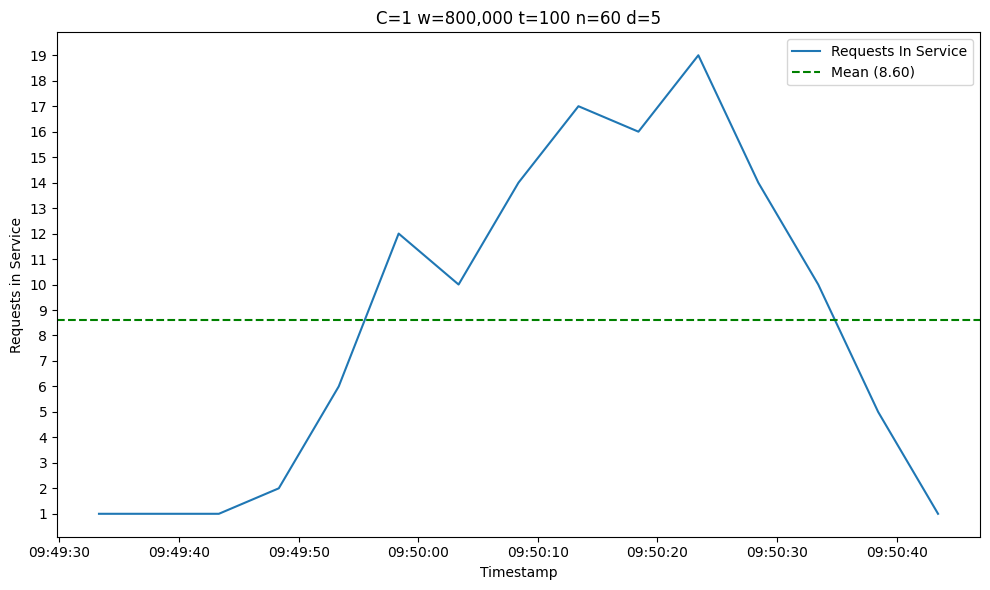

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(int(q_df['in_service'].min()), int(q_df['in_service'].max()) + 1))
plt.legend()
plt.tight_layout()

In [14]:
mean_request_rate = q_df['request_rate'].mean()

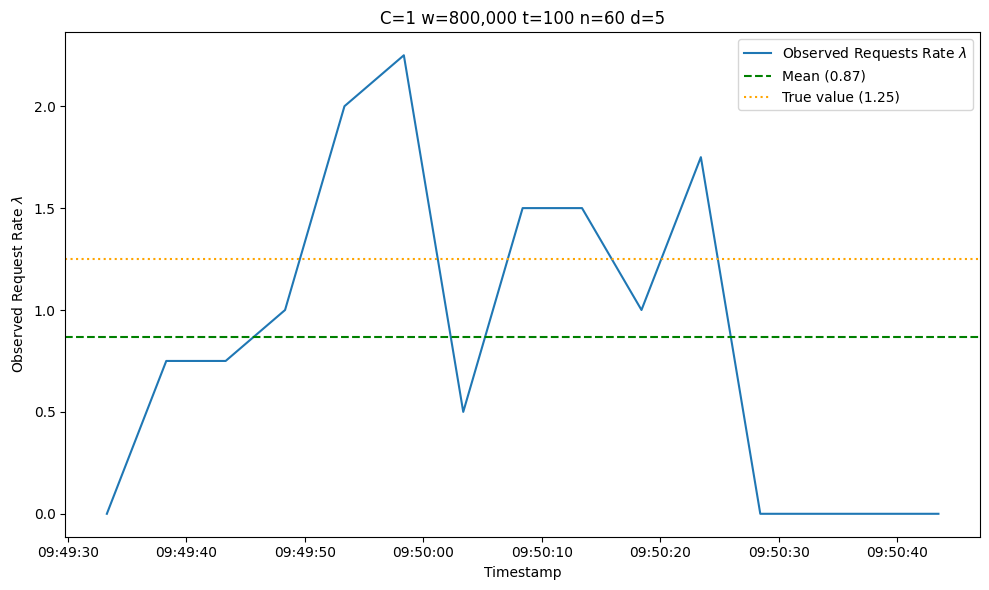

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [16]:
mean_mu_hat = mu_hat.mean()

In [17]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

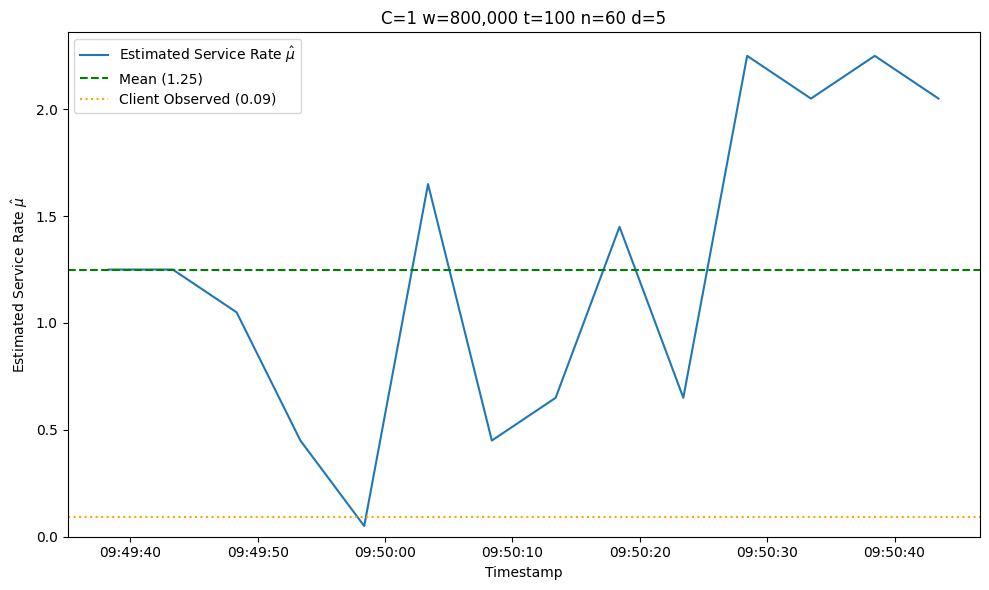

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

# C=1 w=200_000 t=100 n=240 d=5

In [19]:
C=1
w=200_000
t=100
n=240
d=5

In [20]:
lam = float(C*1_000_000/w)

In [21]:
exp_str = f'C{C}_w{w}_t{t}_n{n}_d{d}'

In [22]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fname = f'{data_dir}/round_trips_{exp_str}.csv'

In [23]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_df = pd.read_csv(r_fname, names=['rtt'])

In [24]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [25]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [26]:
mean_in_service = q_df['in_service'].mean()

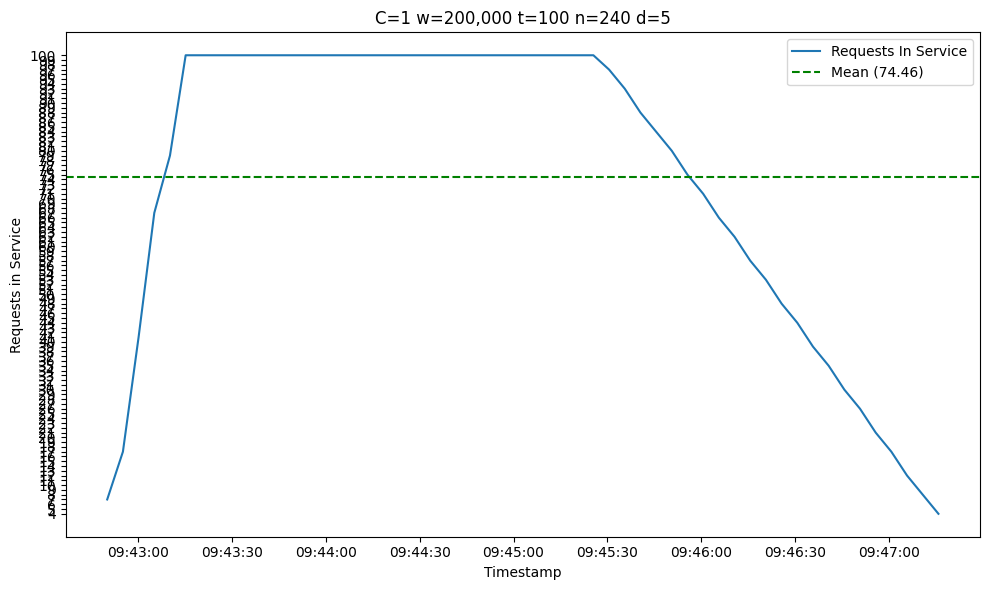

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(int(q_df['in_service'].min()), int(q_df['in_service'].max()) + 1))
plt.legend()
plt.tight_layout()

In [28]:
mean_request_rate = q_df['request_rate'].mean()

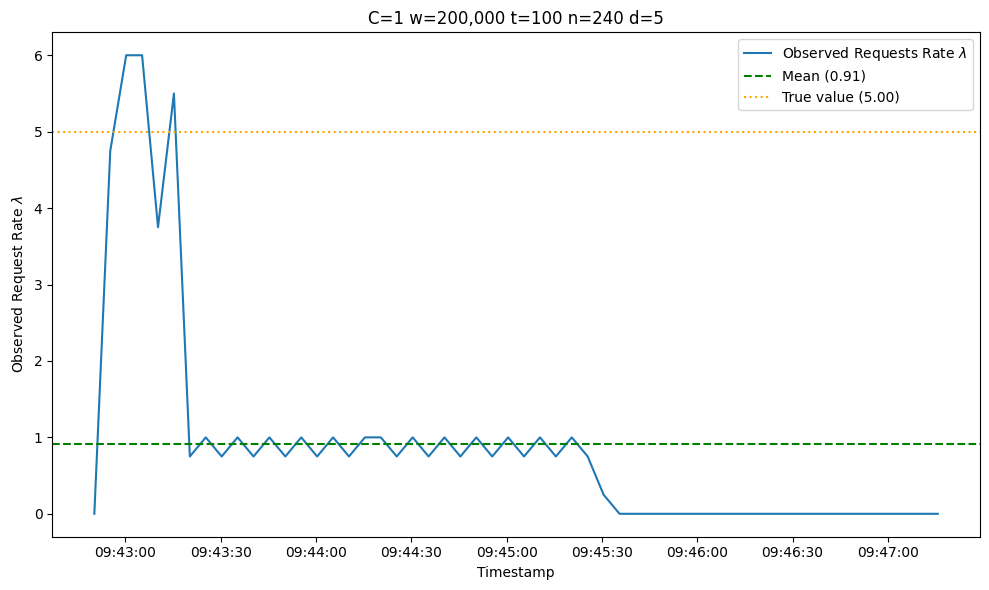

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [30]:
mean_mu_hat = mu_hat.mean()

In [31]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

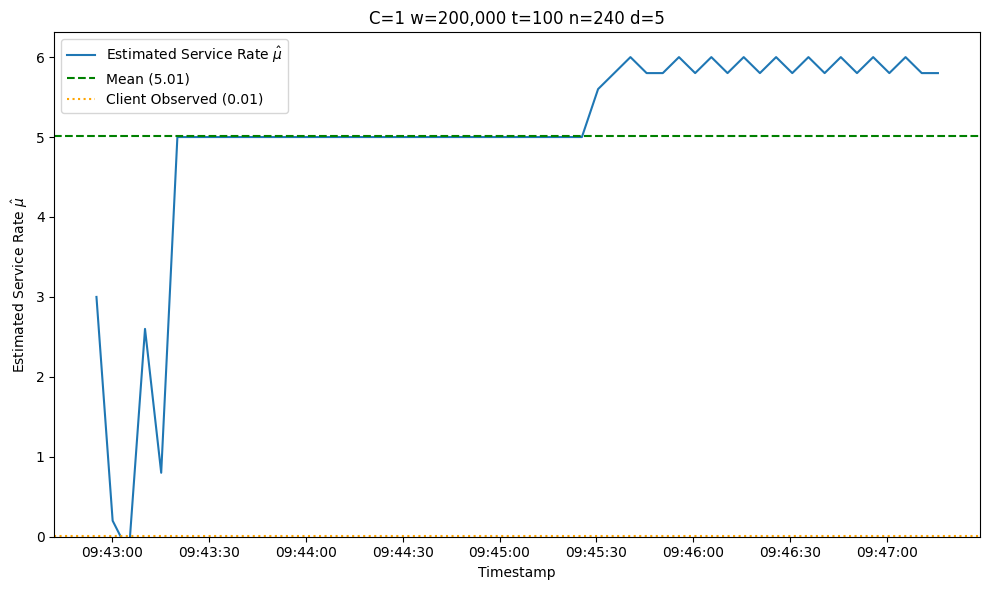

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

# C=4 w=200_000 t=100 n=240 d=5

In [33]:
C=4
w=200_000
t=100
n=240
d=5

In [34]:
lam = float(C*1_000_000/w)

In [35]:
exp_str = f'C{C}_w{w}_t{t}_n{n}_d{d}'

In [36]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fnames = [f'{data_dir}/round_trips_{exp_str}_{i}.csv' for i in range(1, C)]

In [37]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_dfs = [pd.read_csv(r_fname, names=['rtt']) for r_fname in r_fnames]
r_df = pd.concat(r_dfs, ignore_index=True)

In [38]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [39]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [40]:
mean_in_service = q_df['in_service'].mean()

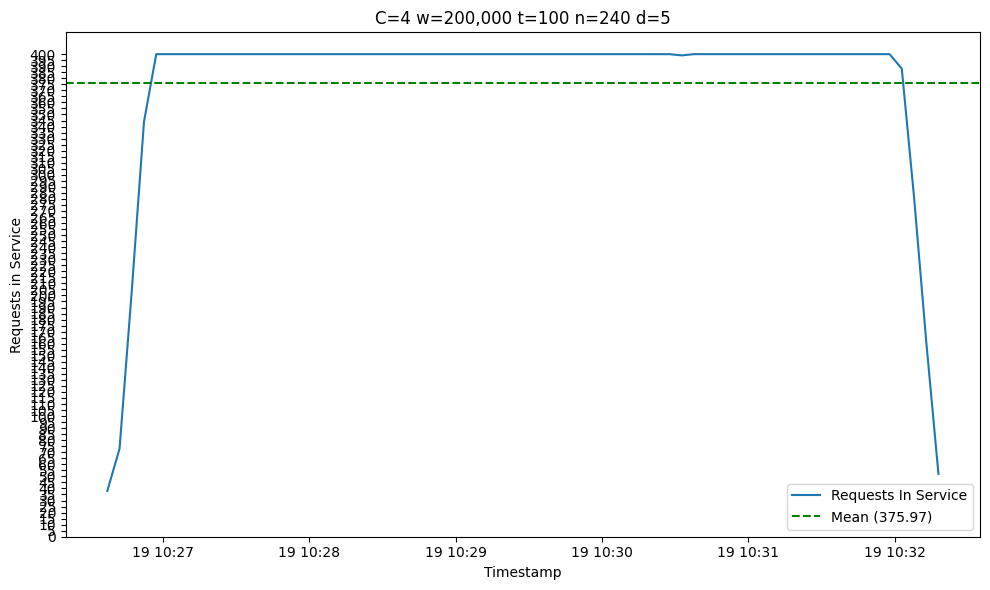

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(0, int(q_df['in_service'].max()) + 1, 5))
plt.legend()
plt.tight_layout()

In [42]:
mean_request_rate = q_df['request_rate'].mean()

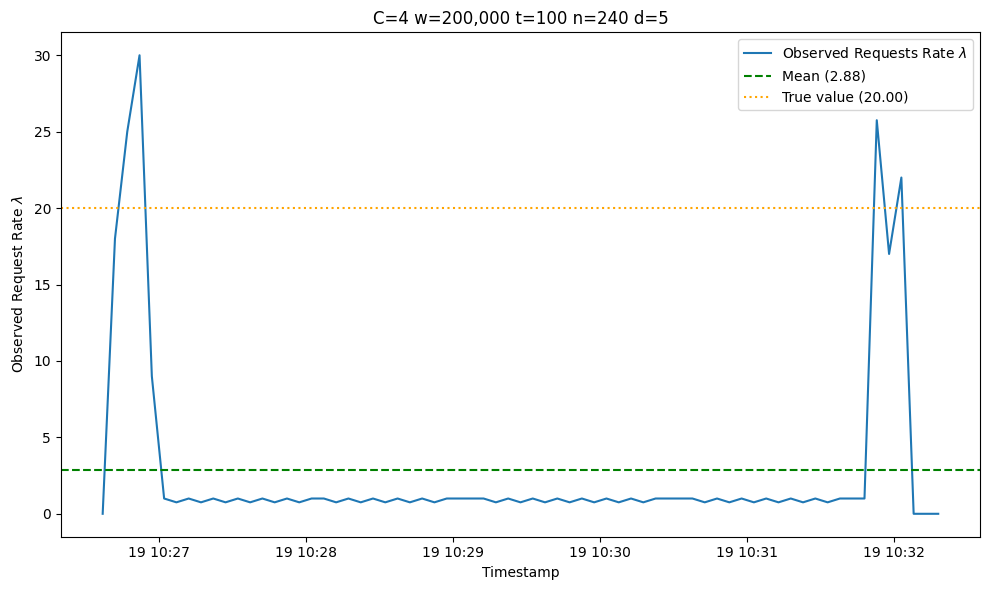

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [44]:
mean_mu_hat = mu_hat.mean()

In [45]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

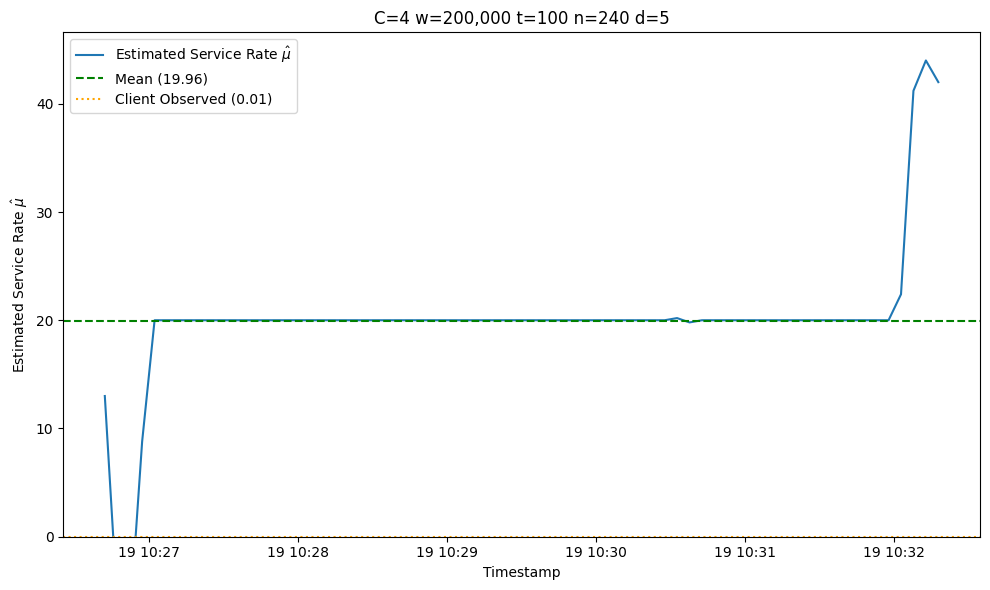

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()